<a href="https://colab.research.google.com/github/ninacchagas/desafio_plusoft/blob/main/Desafio_Plusoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

pd.options.plotting.backend = "plotly"

#Base de dados

In [251]:
df = pd.read_excel('/content/CASE 2023 - Seleção Data Analytics (3).xlsx', sheet_name = 'inf_municipais')

In [252]:
df.shape

(16695, 27)

In [253]:
df.head()

,ANO,CODMUN6,CODMUN7,NOMEMUN,UF,REGIÃO,PORTE,ÁREA (KM²),DISTÂNCIA À CAPITAL (KM),ESPVIDA,...,RDPC,HOMEMTOT,MULHERTOT,PESO15,PESO25,PESO65,PESORUR,PESOTOT,PESOURB,IDHM
0,1991,110001,1100015,ALTA FLORESTA D'OESTE,RO,Região Norte,Pequeno II,7067.127,415.523881,62.01,...,198.46,12401,11146,14000,8872,428,14167,23546,9379,0.329
1,1991,110002,1100023,ARIQUEMES,RO,Região Norte,Médio,4426.571,159.097193,66.02,...,319.47,29495,27318,34461,22193,1035,11529,56812,45283,0.432
2,1991,110003,1100031,CABIXI,RO,Região Norte,Pequeno I,1314.352,640.527835,63.16,...,116.38,4092,3584,4530,2967,199,5760,7676,1916,0.309
3,1991,110004,1100049,CACOAL,RO,Região Norte,Médio,3793.000,400.744653,65.03,...,320.24,35693,34032,42469,27469,1720,27036,69725,42689,0.407
4,1991,110005,1100056,CEREJEIRAS,RO,Região Norte,Pequeno I,2783.300,596.405600,62.73,...,240.10,10004,9367,11799,7689,477,5316,19371,14055,0.386


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO                       16695 non-null  int64  
 1   CODMUN6                   16695 non-null  int64  
 2   CODMUN7                   16695 non-null  int64  
 3   NOMEMUN                   16695 non-null  object 
 4   UF                        16695 non-null  object 
 5   REGIÃO                    16695 non-null  object 
 6   PORTE                     16695 non-null  object 
 7   ÁREA (KM²)                16695 non-null  float64
 8   DISTÂNCIA À CAPITAL (KM)  16695 non-null  float64
 9   ESPVIDA                   16695 non-null  float64
 10  FECTOT                    16695 non-null  float64
 11  MORT1                     16695 non-null  float64
 12  T_ENV                     16695 non-null  float64
 13  E_ANOSESTUDO              16695 non-null  float64
 14  T_ANAL

In [255]:
df.describe()

,ANO,CODMUN6,CODMUN7,ÁREA (KM²),DISTÂNCIA À CAPITAL (KM),ESPVIDA,FECTOT,MORT1,T_ENV,E_ANOSESTUDO,...,RDPC,HOMEMTOT,MULHERTOT,PESO15,PESO25,PESO65,PESORUR,PESOTOT,PESOURB,IDHM
count,16695.000000,16695.000000,1.669500e+04,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,...,16695.000000,1.669500e+04,1.669500e+04,1.669500e+04,1.669500e+04,16695.000000,16695.000000,1.669500e+04,1.669500e+04,16695.000000
mean,2000.333333,325304.894160,3.253053e+06,1525.058665,254.596029,68.411614,2.929683,33.267208,6.686915,8.429125,...,355.659578,1.494271e+04,1.544851e+04,2.151047e+04,1.572325e+04,1858.797544,5840.672836,3.039118e+04,2.455051e+04,0.521337
std,7.760530,98446.250439,9.844625e+05,5607.110807,165.421488,5.445469,1.080477,20.216337,2.417843,1.886575,...,224.156688,8.854414e+04,9.765873e+04,1.407659e+05,1.074645e+05,13219.557970,9123.390438,1.861868e+05,1.824082e+05,0.147535
min,1991.000000,110001.000000,1.100015e+06,3.565000,0.000000,50.970000,1.210000,8.490000,0.280000,0.910000,...,33.240000,3.280000e+02,2.270000e+02,3.800000e+02,2.760000e+02,2.000000,0.000000,5.550000e+02,0.000000e+00,0.120000
25%,1991.000000,251210.000000,2.512101e+06,204.882000,122.158006,64.830000,2.210000,18.440000,4.990000,7.240000,...,182.105000,2.574000e+03,2.451500e+03,3.395000e+03,2.454000e+03,322.000000,1873.500000,5.035000e+03,2.213000e+03,0.409000
50%,2000.000000,314620.000000,3.146206e+06,417.625000,229.014654,69.190000,2.630000,27.000000,6.450000,8.780000,...,299.380000,5.255000e+03,5.068000e+03,6.875000e+03,4.895000e+03,650.000000,3737.000000,1.032600e+04,5.079000e+03,0.539000
75%,2010.000000,411900.000000,4.119004e+06,1025.638000,359.561670,72.650000,3.360000,41.615000,8.180000,9.830000,...,487.240000,1.057050e+04,1.047750e+04,1.415700e+04,1.010750e+04,1351.000000,7312.000000,2.104150e+04,1.295800e+04,0.638500
max,2010.000000,530010.000000,5.300108e+06,159533.306000,1474.314590,78.640000,8.680000,120.120000,20.420000,13.020000,...,2043.740000,5.328632e+06,5.924871e+06,8.912895e+06,7.079797e+06,914646.000000,621065.000000,1.125350e+07,1.115234e+07,0.862000


# Informações Demográficas e Informações Temporais

Diante do cenário apresentado pela Plusoft, eu dividi a minha análise em duas partes: informações demográficas e temporais. Nesta parte, eu estou analisando os seguintes tópicos:



1.   Qual região possui o maior poder aquisitivo? (Calculado a partir da Região / Renda per Capita)
2.   Dentro da região com maior poder aquisitivo, qual o estado que tem o maior poder aquisitivo? (Calculado a partir da UF / Renda per Capita)
3. E dentro deste estado, qual o município que posui o maior poder aquisitivo? (Calculado a partir do Município / Renda per Capita)


Após esta análise mais minunciosa, quando chego na camada mais baixa (município), fiz mais algumas análises para decidir o público alvo das campanhas de marketing do supermercado. Neste município, possuem mais homens ou mulheres? As pessoas residem mais nas áreas rurais ou nas áreas urbanas? Qual a faixa etária das pessoas que moram neste município?

As informações temporais irão aparecer com uso de regressão linear, afim de prever qual será a renda per capita dos habitantes do município definido como o ideal para a instalação da multinacional que irá abrir um supermercado no Brasil.



In [256]:
# Calcular renda média da população por região -- REGIÃO / RDPC

df['RDPC'].mean()

rendaRegiao = df.groupby('REGIÃO')['RDPC']

fig = rendaRegiao.mean().sort_values(ascending = False).plot.bar()

fig.update_layout(xaxis_title = '', yaxis_title = '')

fig.update_traces(text = round(rendaRegiao.mean().sort_values(ascending = False), 2))

fig

In [257]:
# Calcular renda média da população por UF -- UF / RDPC

dfSul = df.loc[df['REGIÃO'] == "Região Sul"]

In [258]:
dfSul['RDPC'].mean()

rendaRegiao = dfSul.groupby('UF')['RDPC']

fig = rendaRegiao.mean().sort_values(ascending = False).plot.bar()

fig.update_layout(xaxis_title = '', yaxis_title = '')

fig.update_traces(text = round(rendaRegiao.mean().sort_values(ascending = False), 2))

In [259]:
# Calcular renda média da população por Municipio -- Municipio / RDPC

dfEstado = df.loc[df['UF'] == "SC"]

In [260]:
dfEstado['RDPC'].mean()

rendaRegiao = dfEstado.groupby('NOMEMUN')['RDPC']

fig = rendaRegiao.mean().sort_values(ascending = False)[:10].plot.bar()

fig.update_layout(xaxis_title = '', yaxis_title = '')

fig.update_traces(text = round(rendaRegiao.mean().sort_values(ascending = False), 2))

In [261]:
# Calcular o número de mulheres e homens no município

dfMunic = df.loc[df['NOMEMUN'] == "FLORIANÓPOLIS"]

totalM = dfMunic['HOMEMTOT'].sum()
totalF = dfMunic['MULHERTOT'].sum()

dfGenero = pd.DataFrame({
    "Genero" : ['M', 'F'],
    "Total" :  [totalM, totalF]
})

In [262]:
dfGenero

,Genero,Total
0,M,494052
1,F,528428


In [263]:
fig = px.pie(dfGenero, values='Total', names='Genero')
fig.show()

In [264]:
# Calcular quantidade de pessoas que moram em zona rural e urbana

totalR = dfMunic['PESORUR'].sum()
totalU = dfMunic['PESOURB'].sum()

dfZona = pd.DataFrame({
    "Zona" : ['Rural', 'Urbana'],
    "Total" :  [totalR, totalU]
})

In [265]:
fig = px.pie(dfZona, values='Total', names='Zona')
fig.show()

In [266]:
total15 = dfMunic['PESO15'].sum()
total25 = dfMunic['PESO25'].sum()
total65 = dfMunic['PESO65'].sum()

dfIdade = pd.DataFrame({
    "Faixa de idade" : ['A partir de 15', 'A partir de 25', 'A partir de 65'],
    "Total" :  [total15, total25, total65]
})

In [267]:
fig = px.pie(dfIdade, values='Total', names='Faixa de idade')
fig.show()

Finalizando esta primeira parte, podemos perceber que o público alvo da multinacional pode ser, principalmente:


*   Mulheres da região sul
*   Especificamente de Florianópolis
*   Com idade a partir de 15 anos, até 25 anos
*   Que morem nas reguões urbanas



In [268]:
anos = dfMunic['ANO'].unique()
anos

array([1991, 2000, 2010])

In [269]:
renda = dfMunic['RDPC'].unique()
renda

array([ 921.95, 1383.78, 1798.12])

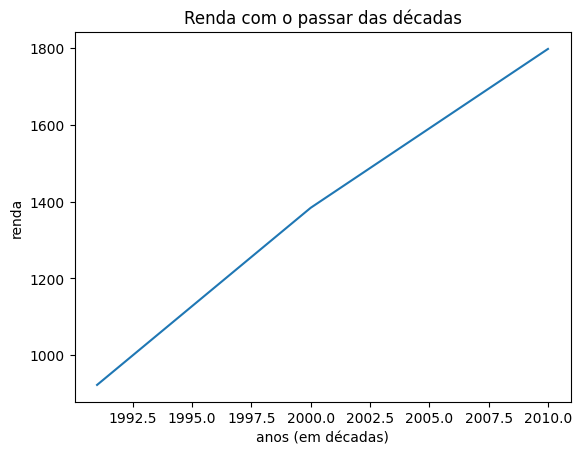

In [270]:
plt.plot(anos, renda)
plt.title('Renda com o passar das décadas')
plt.xlabel('anos (em décadas)')
plt.ylabel('renda')
plt.show()

In [271]:
# Variável dependente

y = dfMunic['RDPC'].values

In [272]:
# Variável independente

X = dfMunic['ANO'].values.reshape(-1, 1)

In [273]:
print(y)
print(X)

[ 921.95 1383.78 1798.12]
[[1991]
 [2000]
 [2010]]


In [274]:
# Criando modelo
# Variáveis de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.1,
    random_state = 7
)

In [275]:
print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 2
len(y_train) = 2

len(X_test) = 1
len(y_test) = 1


In [276]:
# Criando o modelo
modelo = LinearRegression()

In [277]:
modelo.fit(X_train, y_train)

LinearRegression()

In [278]:
modelo.score(X_train, y_train)

1.0

In [279]:
modelo.predict([[2020]])

array([2410.06888889])

In [280]:
previsaoRenda = pd.DataFrame({
    'ANO': 2020,
    'RDPC' : modelo.predict([[2020]])
})

previsaoRenda

dfMunic = pd.concat([
    previsaoRenda, dfMunic
]).reset_index(drop = True)

dfMunic = dfMunic.iloc[:, [0, 1]]

In [281]:
dfMunic = dfMunic.sort_values(by = 'ANO')

Text(0.5, 1.0, 'Previsão de renda per capita daqui dez anos')

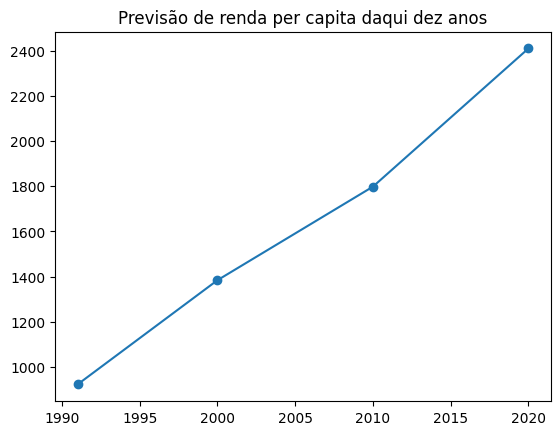

In [285]:
plt.plot(dfMunic['ANO'], dfMunic['RDPC'], marker='o')

plt.title('Previsão de renda per capita daqui dez anos')